In [1]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
le = LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
mBusData = pd.read_csv('/content/drive/MyDrive/datasets/Iot_processed/IoT_Weather.csv')
mBusData.head()

,date,time,temperature,pressure,humidity,label,type
0,31-Mar-19,12:36:52,31.788508,1.035,32.036579,0,normal
1,31-Mar-19,12:36:53,41.630997,1.035,30.886165,0,normal
2,31-Mar-19,12:36:54,42.256959,1.035,19.755908,0,normal
3,31-Mar-19,12:36:55,49.116581,1.035,78.949621,0,normal
4,31-Mar-19,12:36:56,24.017085,1.035,40.001059,0,normal


In [4]:
mBusData.drop('type', axis = 1, inplace=True)
mBusData.drop(mBusData.iloc[:, 0:2], axis = 1, inplace=True)
mBusData.head()

,temperature,pressure,humidity,label
0,31.788508,1.035,32.036579,0
1,41.630997,1.035,30.886165,0
2,42.256959,1.035,19.755908,0
3,49.116581,1.035,78.949621,0
4,24.017085,1.035,40.001059,0


In [5]:
# import matplotlib.pyplot as plt
# columns = mBusData.columns
# for col in columns:
#     print("col: ", col)
#     mBusData[col].hist(bins = 100)
#     plt.show()

# **Train Test with Skfold**

In [6]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

x=mBusData[['temperature',	'pressure',	'humidity']]
y=mBusData[['label' ]]

# Without Oversampling

In [7]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
DtreeAccuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of Decisiontree  : ",DtreeAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
Dtreef1_scr = f1_score(y_test, y_pred_dtc)
print("f1_score of Decisiontree  : ",Dtreef1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_dtc)
print('AUC: %.2f' % auc)

[0 0 0 ... 0 0 0]
Accuracy of Decisiontree  :  96.92052165354332 %
f1_score of Decisiontree  :  88.84630809678713 %
AUC: 0.93


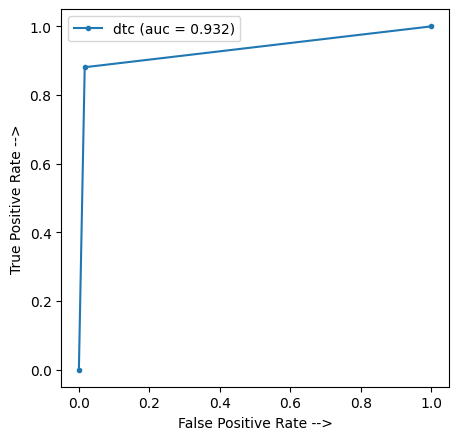

In [8]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

# Oversampling

In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np
#Seeing the value count before oversampling
unique, count = np.unique(y_train, return_counts = True)
y_train_dict_value_count = {k:v for (k,v) in zip(unique, count)}
print("Before oversampling",y_train_dict_value_count)

sm = SMOTE(random_state=12)
x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train)

# Seeing the value count after oversampling
unique, count = np.unique(y_train_sm, return_counts = True)
y_train_smote_value_count = {k:v for (k,v) in zip(unique, count)}
print("After oversampling",y_train_smote_value_count)

Before oversampling {0: 489754, 1: 79208}
After oversampling {0: 489754, 1: 489754}


In [10]:
# --------------------------Decision Tree -----------------------------------
for train_index, test_index in skf.split(x_train_sm, y_train_sm):
    x_train, x_test, y_train, y_test = x_train_sm.iloc[train_index], x_train_sm.iloc[test_index], y_train_sm.iloc[train_index], y_train_sm.iloc[test_index]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train) #Training the model
y_pred_dtc = dtc.predict(x_test)
print(y_pred_dtc)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
dtcAccuracy = accuracy_score(y_test, y_pred_dtc)
print("Accuracy of DicisionTree : ",dtcAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
dtcf1_scr = f1_score(y_test, y_pred_dtc)
print("f1_score of DicisionTree : ",dtcf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_dtc)
print('AUC: %.2f' % auc)

[0 0 0 ... 1 1 1]
Accuracy of DicisionTree :  96.38755941782779 %
f1_score of DicisionTree :  96.37337137890604 %
AUC: 0.96


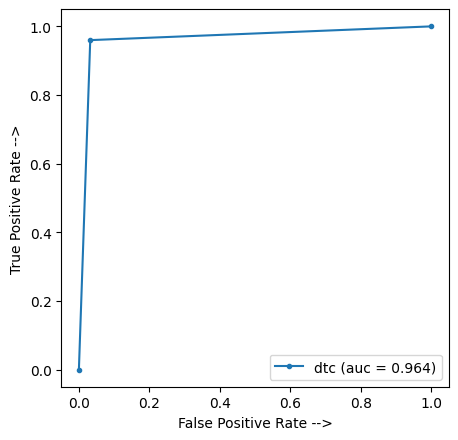

In [11]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc, confusion_matrix

dtc_fpr, dtc_tpr, threshold = roc_curve(y_test, y_pred_dtc)
auc_dtc = auc(dtc_fpr, dtc_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='dtc (auc = %0.3f)' % auc_dtc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [ ]:
confusion_matrix(y_test,y_pred_dtc)

# Undersampling